Перші 5 рядків:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Перевірка пропущених значень:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Кількість дублікатів: 0

Типи даних:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup 

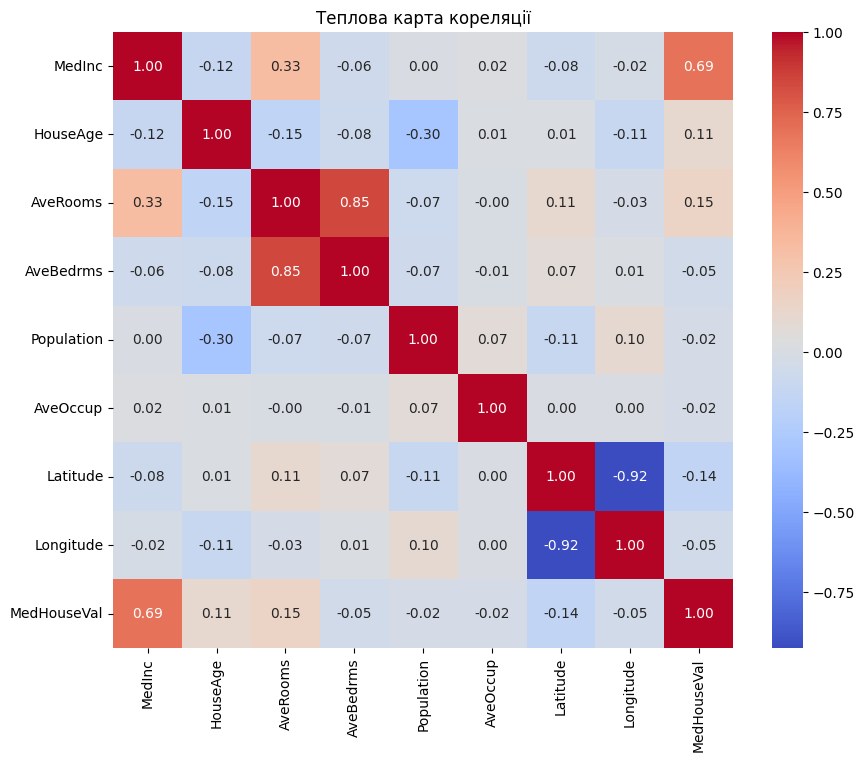


Навчання LinearRegression...

Навчання RandomForestRegressor...


In [ ]:
# 1. Імпортуємо необхідні бібліотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Завантажуємо датасет
california = fetch_california_housing(as_frame=True)
df = california.frame

# Виводимо перші 5 рядків
print("Перші 5 рядків:")
print(df.head())

# 3. Аналіз даних
print("\nПеревірка пропущених значень:")
print(df.isnull().sum())

print("\nКількість дублікатів:", df.duplicated().sum())

print("\nТипи даних:")
print(df.dtypes)

print("\nКореляція з цільовою змінною:")
correlation = df.corr()['MedHouseVal'].drop('MedHouseVal').sort_values(ascending=False)
print(correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Теплова карта кореляції")
plt.show()

# 4. Масштабування ознак
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Поділ на тренувальні і тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Моделі
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'Ridge': Ridge()
}

# Параметри для GridSearchCV
param_grids = {
    'RandomForestRegressor': {
        'n_estimators': [50, 100],
        'max_depth': [5, 10]
    },
    'Ridge': {
        'alpha': [0.1, 1.0, 10.0]
    }
}

best_models = {}
results = {}

# 7. Навчання моделей
for name, model in models.items():
    print(f"\nНавчання {name}...")
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], cv=3, scoring='r2', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        print("Найкращі параметри:", grid.best_params_)
    else:
        model.fit(X_train, y_train)
        best_models[name] = model

# 8. Метрики і графіки
plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'r2': r2, 'mse': mse}

    plt.subplot(1, 3, i+1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Справжні значення")
    plt.ylabel("Прогноз")
    plt.title(f"{name}\nR²: {r2:.2f}, MSE: {mse:.2f}")

plt.tight_layout()
plt.show()

# 9. Виведення результатів
print("\nМетрики моделей:")
for name, metrics in results.items():
    print(f"{name}: R² = {metrics['r2']:.4f}, MSE = {metrics['mse']:.4f}")

# 10. Справжні і прогнозовані значення (приклад для кращої моделі)
best_model_name = max(results, key=lambda x: results[x]['r2'])
print(f"\nНайкраща модель: {best_model_name}")

final_model = best_models[best_model_name]
y_pred_final = final_model.predict(X_test)

comparison = pd.DataFrame({
    'Справжні': y_test.values,
    'Прогнозовані': y_pred_final
})
print("\nПорівняння (перші 10 рядків):")
print(comparison.head(10))

# 11. ВИСНОВКИ
print("\n🔎 ВИСНОВКИ:")
print(f"- Найвищу точність показала модель: {best_model_name}")
print("- Добре корелюючі ознаки: MedInc, AveRooms, HouseAge")
print("- Після масштабування ознак моделі краще справляються з передбаченням.")
